In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns


**Reading CSV Data**

In [2]:
df = pd.read_csv('/kaggle/input/nasa-asteroids-classification/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.shape

(4687, 40)

In [4]:
df.info

<bound method DataFrame.info of       Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0              3703080  3703080              21.600            0.127220   
1              3723955  3723955              21.300            0.146068   
2              2446862  2446862              20.300            0.231502   
3              3092506  3092506              27.400            0.008801   
4              3514799  3514799              21.600            0.127220   
...                ...      ...                 ...                 ...   
4682           3759007  3759007              23.900            0.044112   
4683           3759295  3759295              28.200            0.006089   
4684           3759714  3759714              22.700            0.076658   
4685           3759720  3759720              21.800            0.116026   
4686           3772978  3772978              19.109            0.400641   

      Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0

**Dropping Irrevelant Data**

In [5]:
df = df.drop(['Neo Reference ID', 'Name','Orbit ID','Close Approach Date','Epoch Date Close Approach', 'Orbit Determination Date'], axis=1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


**One Hot Encoding of Hazardous Column**

In [6]:
hazardous_labels = pd.get_dummies(df['Hazardous'])
hazardous_labels

,False,True
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
4682,True,False
4683,True,False
4684,True,False
4685,True,False


In [7]:
df = pd.concat([df, hazardous_labels], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,False,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,True,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,False,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,True,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,False,True


In [8]:
df = df.drop(['Hazardous'], axis = 1)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,False,True
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,False,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,True,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,False,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,True,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,False,True


In [9]:
df.info

<bound method DataFrame.info of       Absolute Magnitude  Est Dia in KM(min)  Est Dia in KM(max)  \
0                 21.600            0.127220            0.284472   
1                 21.300            0.146068            0.326618   
2                 20.300            0.231502            0.517654   
3                 27.400            0.008801            0.019681   
4                 21.600            0.127220            0.284472   
...                  ...                 ...                 ...   
4682              23.900            0.044112            0.098637   
4683              28.200            0.006089            0.013616   
4684              22.700            0.076658            0.171412   
4685              21.800            0.116026            0.259442   
4686              19.109            0.400641            0.895860   

      Est Dia in M(min)  Est Dia in M(max)  Est Dia in Miles(min)  \
0            127.219879         284.472297               0.079051   
1            

**Oberserving Unique Values in Orbiting Body and Equinox**

In [10]:
df['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [11]:
df['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [12]:

df = df.drop(['Orbiting Body', 'Equinox'], axis=1, errors='ignore')


**Heatmap of Correlation**

<Axes: >

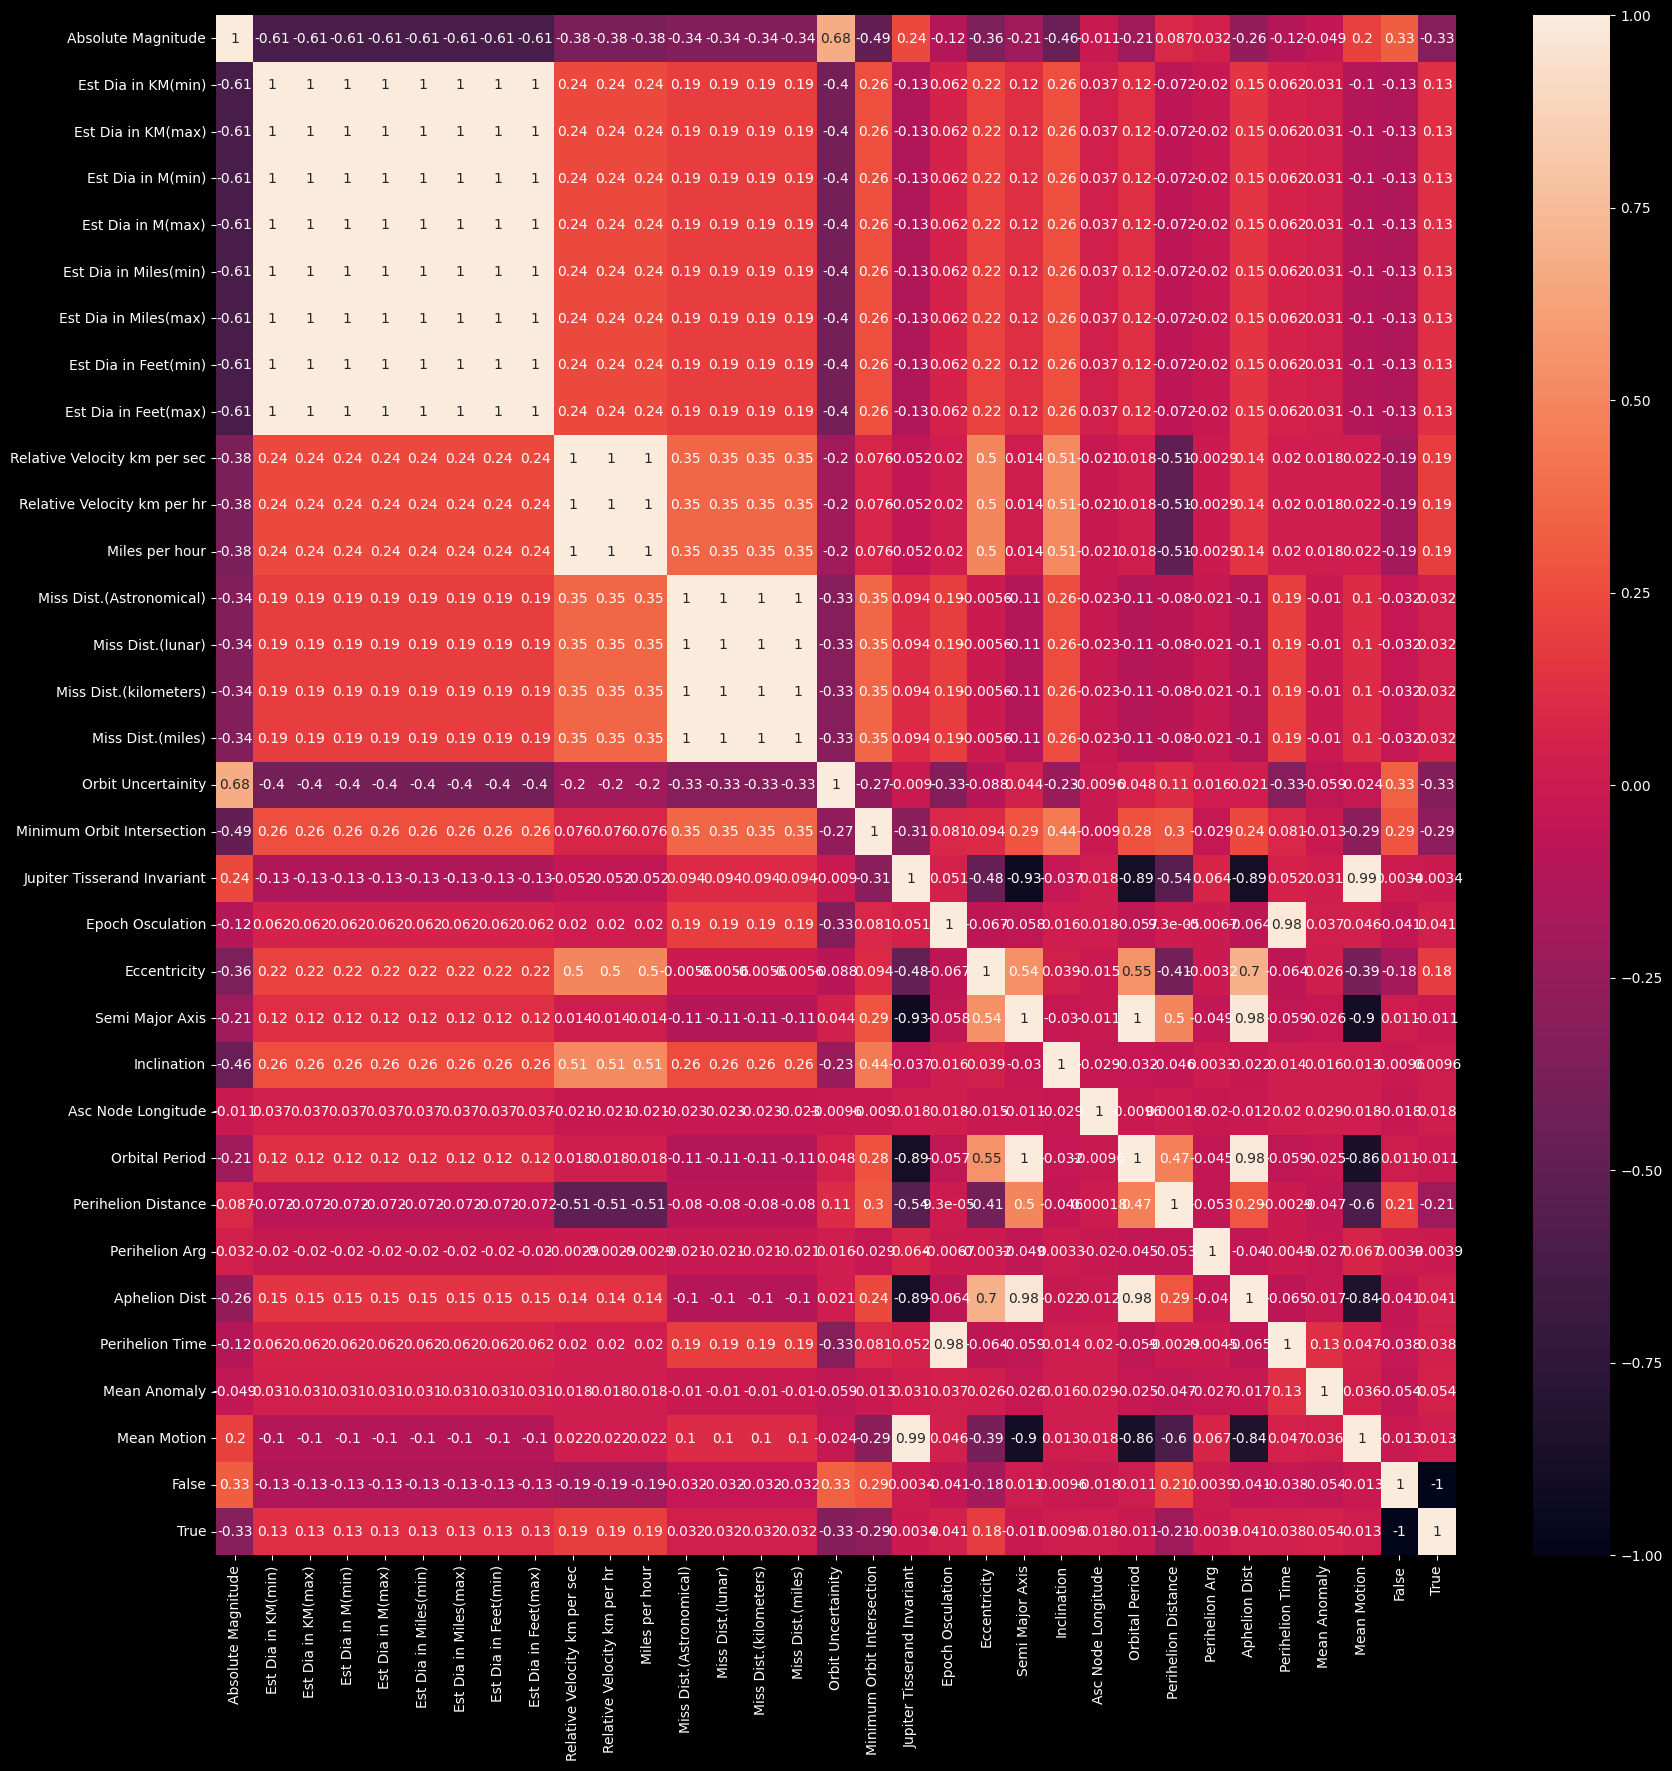

In [13]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

**Many columns are there are having correlation 1 because thet are identical columns with a different unit so they can be dropped**

In [14]:
df = df.drop(
    [
        'Est Dia in KM(max)',
        'Est Dia in M(min)',
        'Est Dia in M(max)',
        'Est Dia in Miles(min)',
        'Est Dia in Miles(max)',
        'Est Dia in Feet(max)',
        'Miles per hour',
        'Relative Velocity km per sec',
        'Miss Dist.(Astronomical)',
        'Miss Dist.(lunar)',
        'Miss Dist.(miles)'
    ],
    axis=1,
    errors='ignore'
)


**Final Heatmap**

<Axes: >

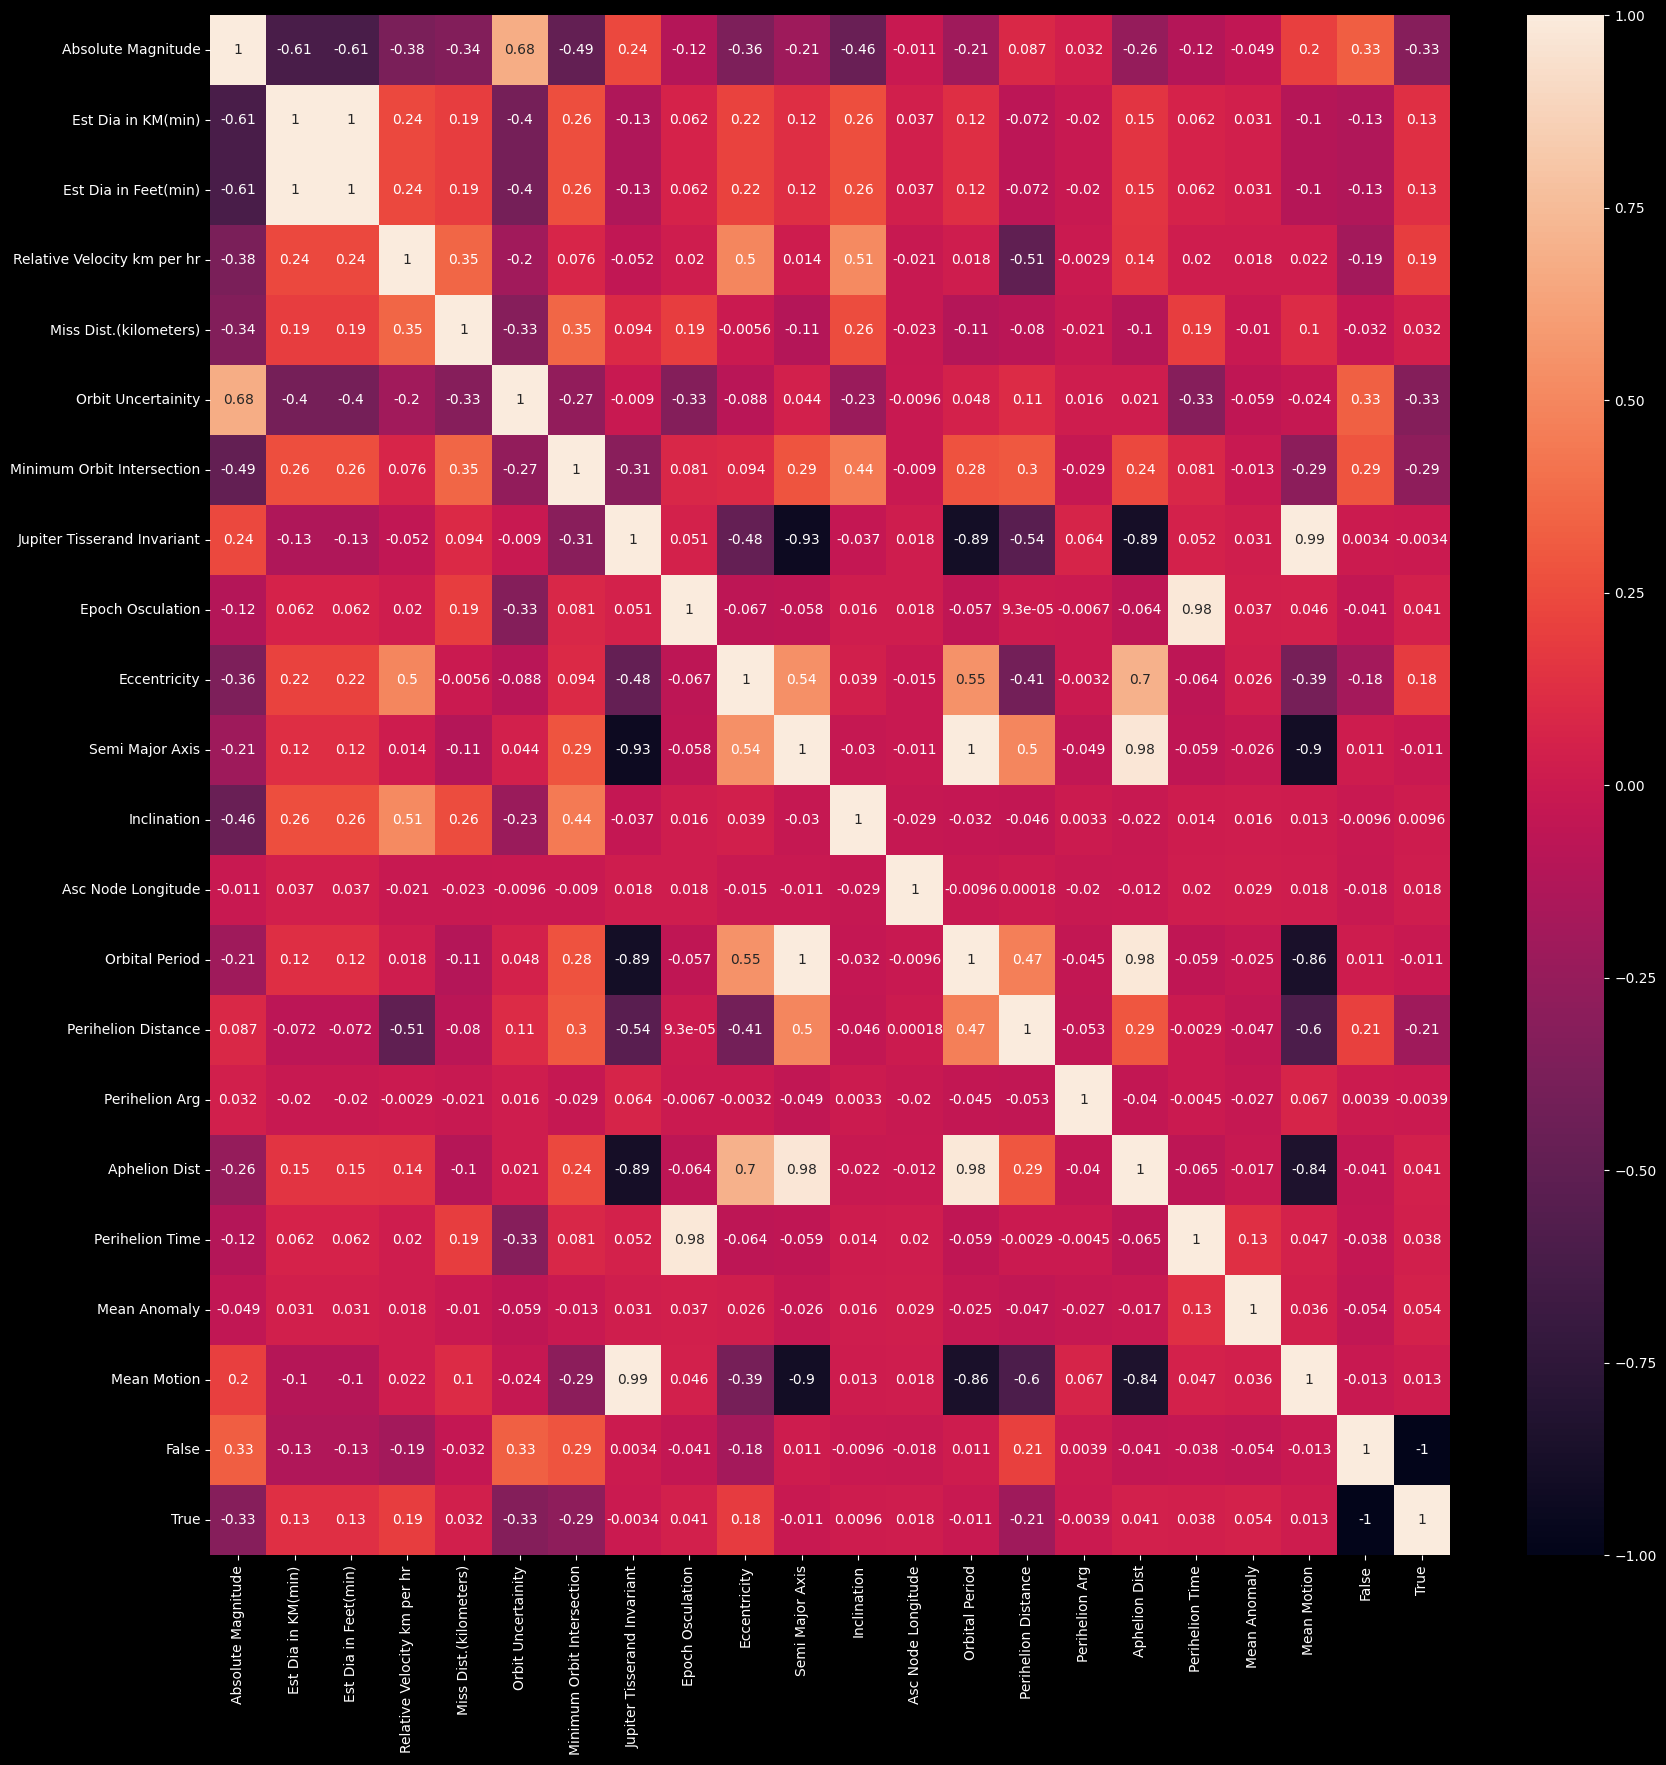

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

**Drop false column , true is enough for classification**

In [16]:
df.drop([False],axis = 1, inplace = True)

In [17]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in Feet(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,True
0,21.6,0.127220,417.388066,22017.003799,62753692.0,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,479.225620,65210.346095,57298148.0,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,759.521423,27326.560182,7622911.5,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,28.876199,40225.948191,42683616.0,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,417.388066,35426.991794,61010824.0,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [18]:
x= df.drop([True], axis =1)
y = df[True].astype(int) 


In [19]:
df.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in Feet(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,22.267865,0.204604,671.273653,50294.919829,3.841347e+07,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,2.890972,0.369573,1212.511199,26255.601377,2.181110e+07,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,11.160000,0.001011,3.315431,1207.814804,2.660989e+04,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,20.100000,0.033462,109.784247,30358.313370,1.995928e+07,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,21.900000,0.110804,363.529809,46504.401181,3.964771e+07,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,24.500000,0.253837,832.798679,65079.535405,5.746863e+07,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,32.100000,15.579552,51114.018738,160681.487851,7.478160e+07,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


**Model Building**

dropping true from x beacause we need to predict it, x contains all features
assigning true to y


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0 , test_size = 0.3)

**XGBoost Classifier**
Decision tree based ensemble ML algo that uses a gradient boosting framework. In prediction problems involving unstructured data - images and text.
A wide range of applications- can be used to solve regression, classification, ranking and user defined prediction problems.

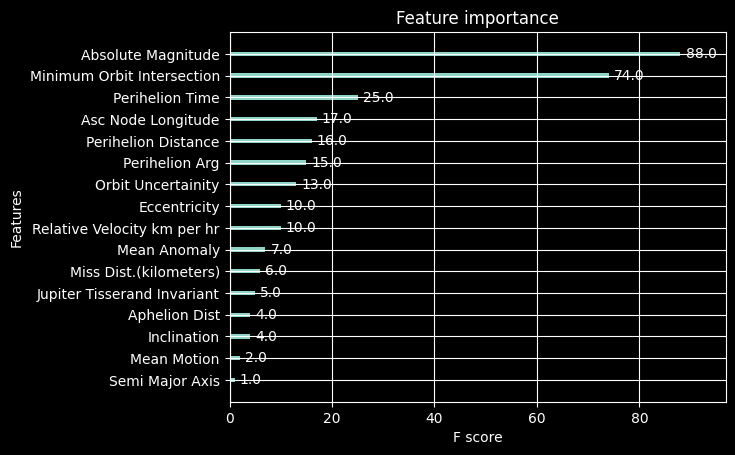

In [21]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

# Initialize the XGBClassifier
xgb_model = XGBClassifier()

# Fit the model with training data
xgb_model.fit(x_train, y_train)

# Plot feature importance
plot_importance(xgb_model)
plt.show()


**Final Accuracy Score**

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions = xgb_model.predict(x_test)
acc = accuracy_score(y_test, predictions)
acc
print(str(np.round(acc * 100, 2)) + '%')
print(classification_report(y_test, predictions))
print(confusion_matrix)




99.64%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       0.99      0.99      0.99       226

    accuracy                           1.00      1407
   macro avg       0.99      0.99      0.99      1407
weighted avg       1.00      1.00      1.00      1407

<function confusion_matrix at 0x7c4a6ff104c0>
